TUJUAN:
Bangun, latih, dan uji model XG-Boost untuk menyelesaikan masalah regresi dan memprediksi peluang masuk universitas berdasarkan profil siswa.

TOOL:
Jupyter Notebook, Google Colab danScikit-Learn

APLIKASI PADA DUNIA NYATA:
Menentukan siswa yang memenuhi syarat oleh Kantor Penerimaan Universitas.

DATA:
*MASUKAN (FITUR”):

*GRE Scores (out of 340)

*TOEFL Scores (out of 120)

*University Rating (out of 5)

*Statement of Purpose (SOP)

*Letter of Recommendation (LOR) Strength (out of 5)

*Undergraduate GPA (out of 10)

*Research Experience (either 0 or 1)

KELUARAN:
Chance of admission (berkisar dari 0 sampai 1)

In [3]:
#import library as needed
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
university_df = pd.read_csv("university_admission.csv")
university_df

In [5]:
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [6]:
university_df.shape

(1000, 8)

In [7]:
university_df.isnull().sum() #tidak ada data na

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

In [8]:
university_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [9]:
university_df.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_Rating        int64
SOP                    float64
LOR                    float64
CGPA                   float64
Research                 int64
Chance_of_Admission    float64
dtype: object

In [10]:
#LATIHAN 2
#mencari nilai TOEFL max, mean, dan min
#maksimum score
university_df['TOEFL_Score'].max()

120

In [11]:
university_df['TOEFL_Score'].mean()

107.193

In [12]:
university_df['TOEFL_Score'].min()

92

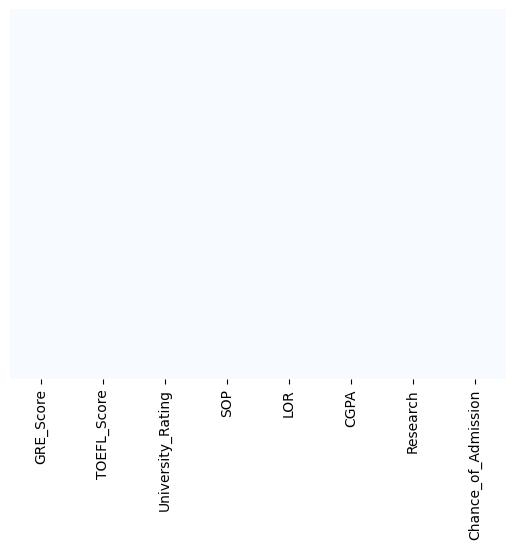

In [13]:
#cek dgn visualisasi apakah terdapat nilai null
sns.heatmap(university_df.isnull(), yticklabels= False, cbar= False, cmap="Blues")
plt.show()

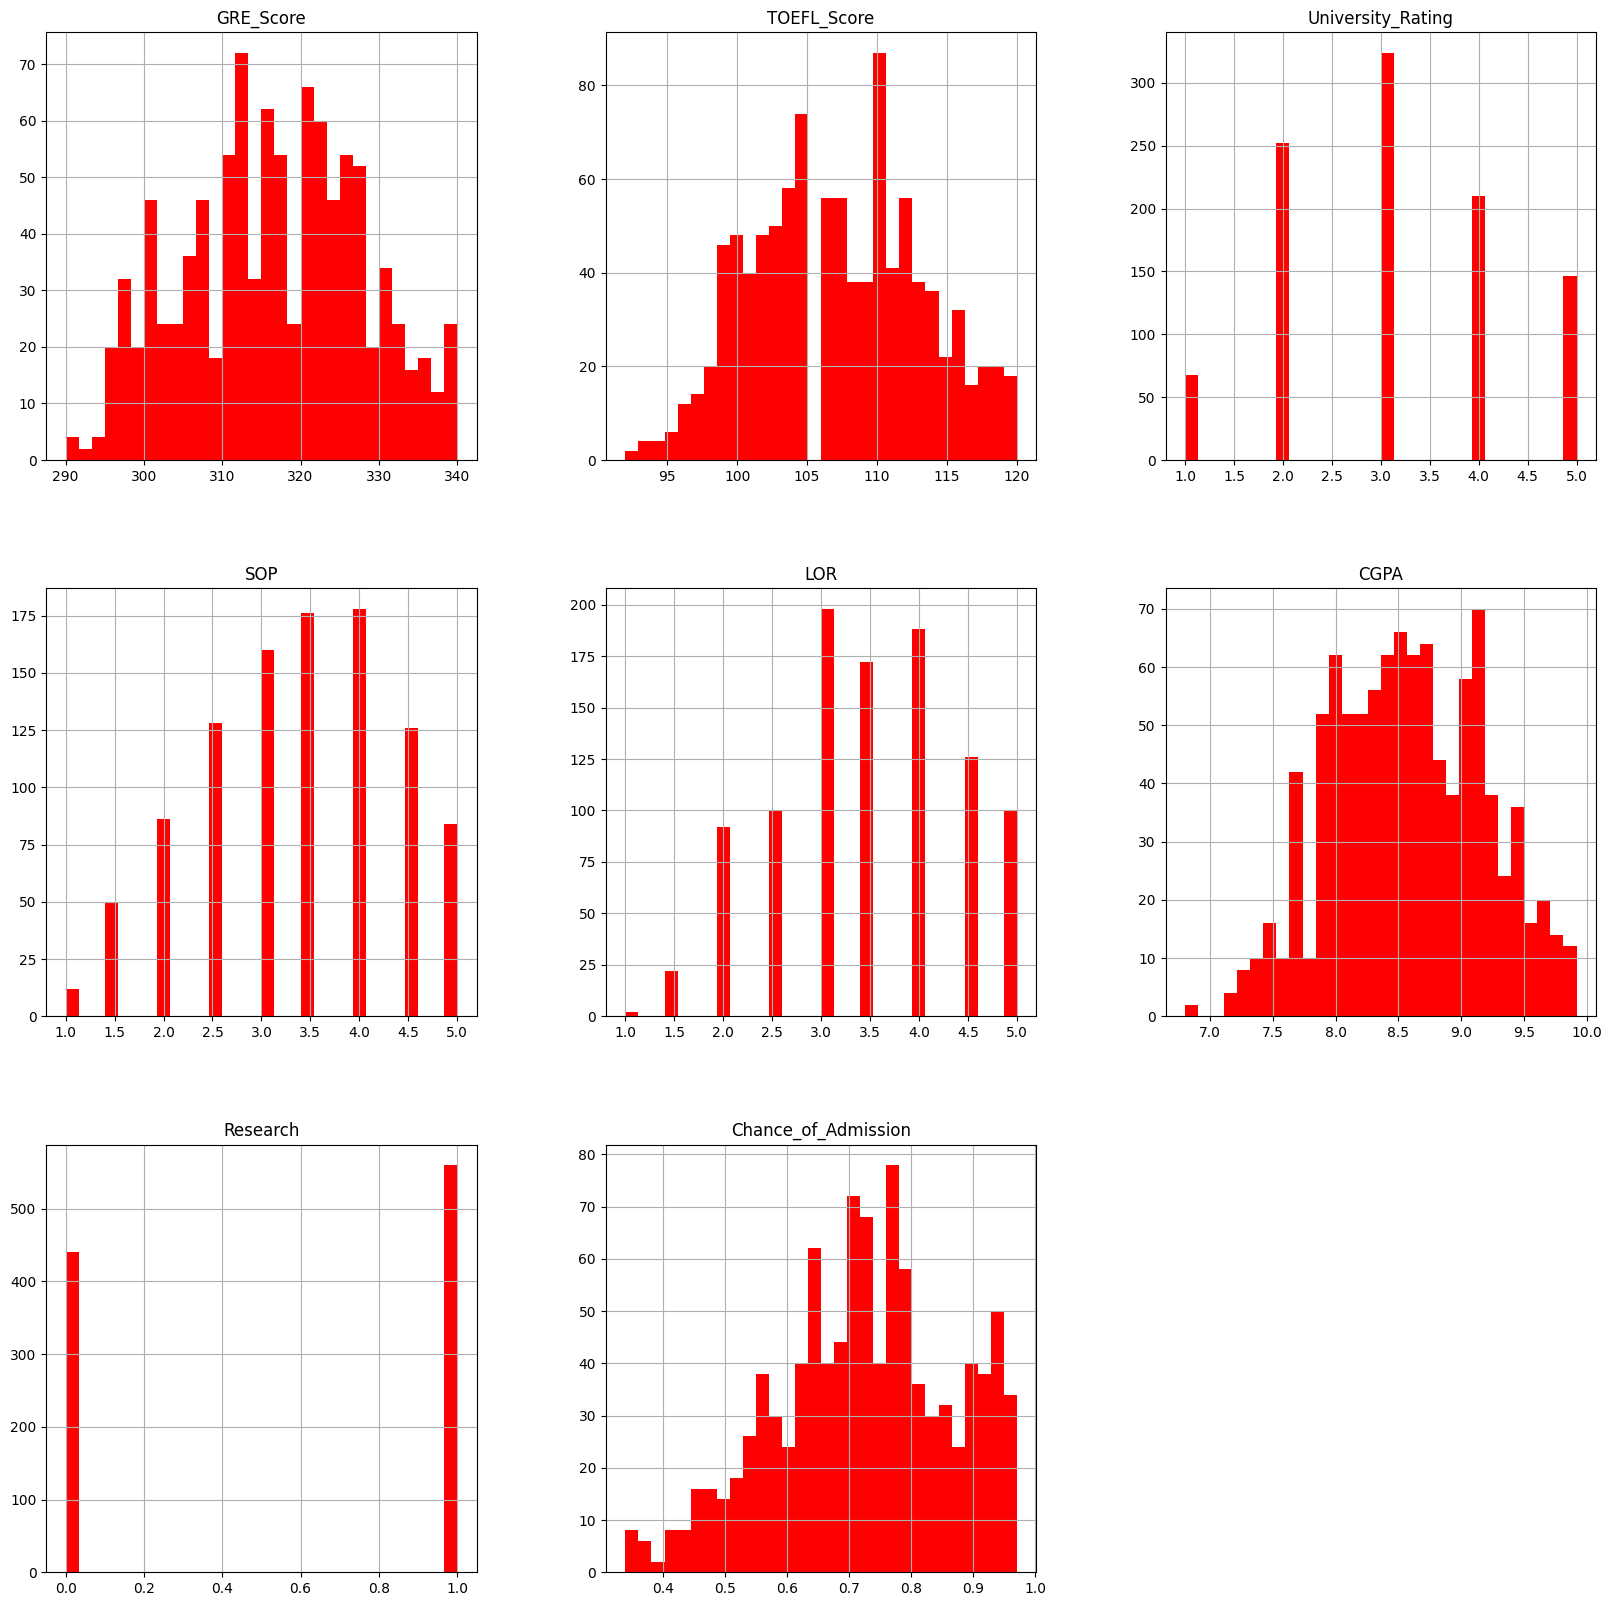

In [14]:
university_df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

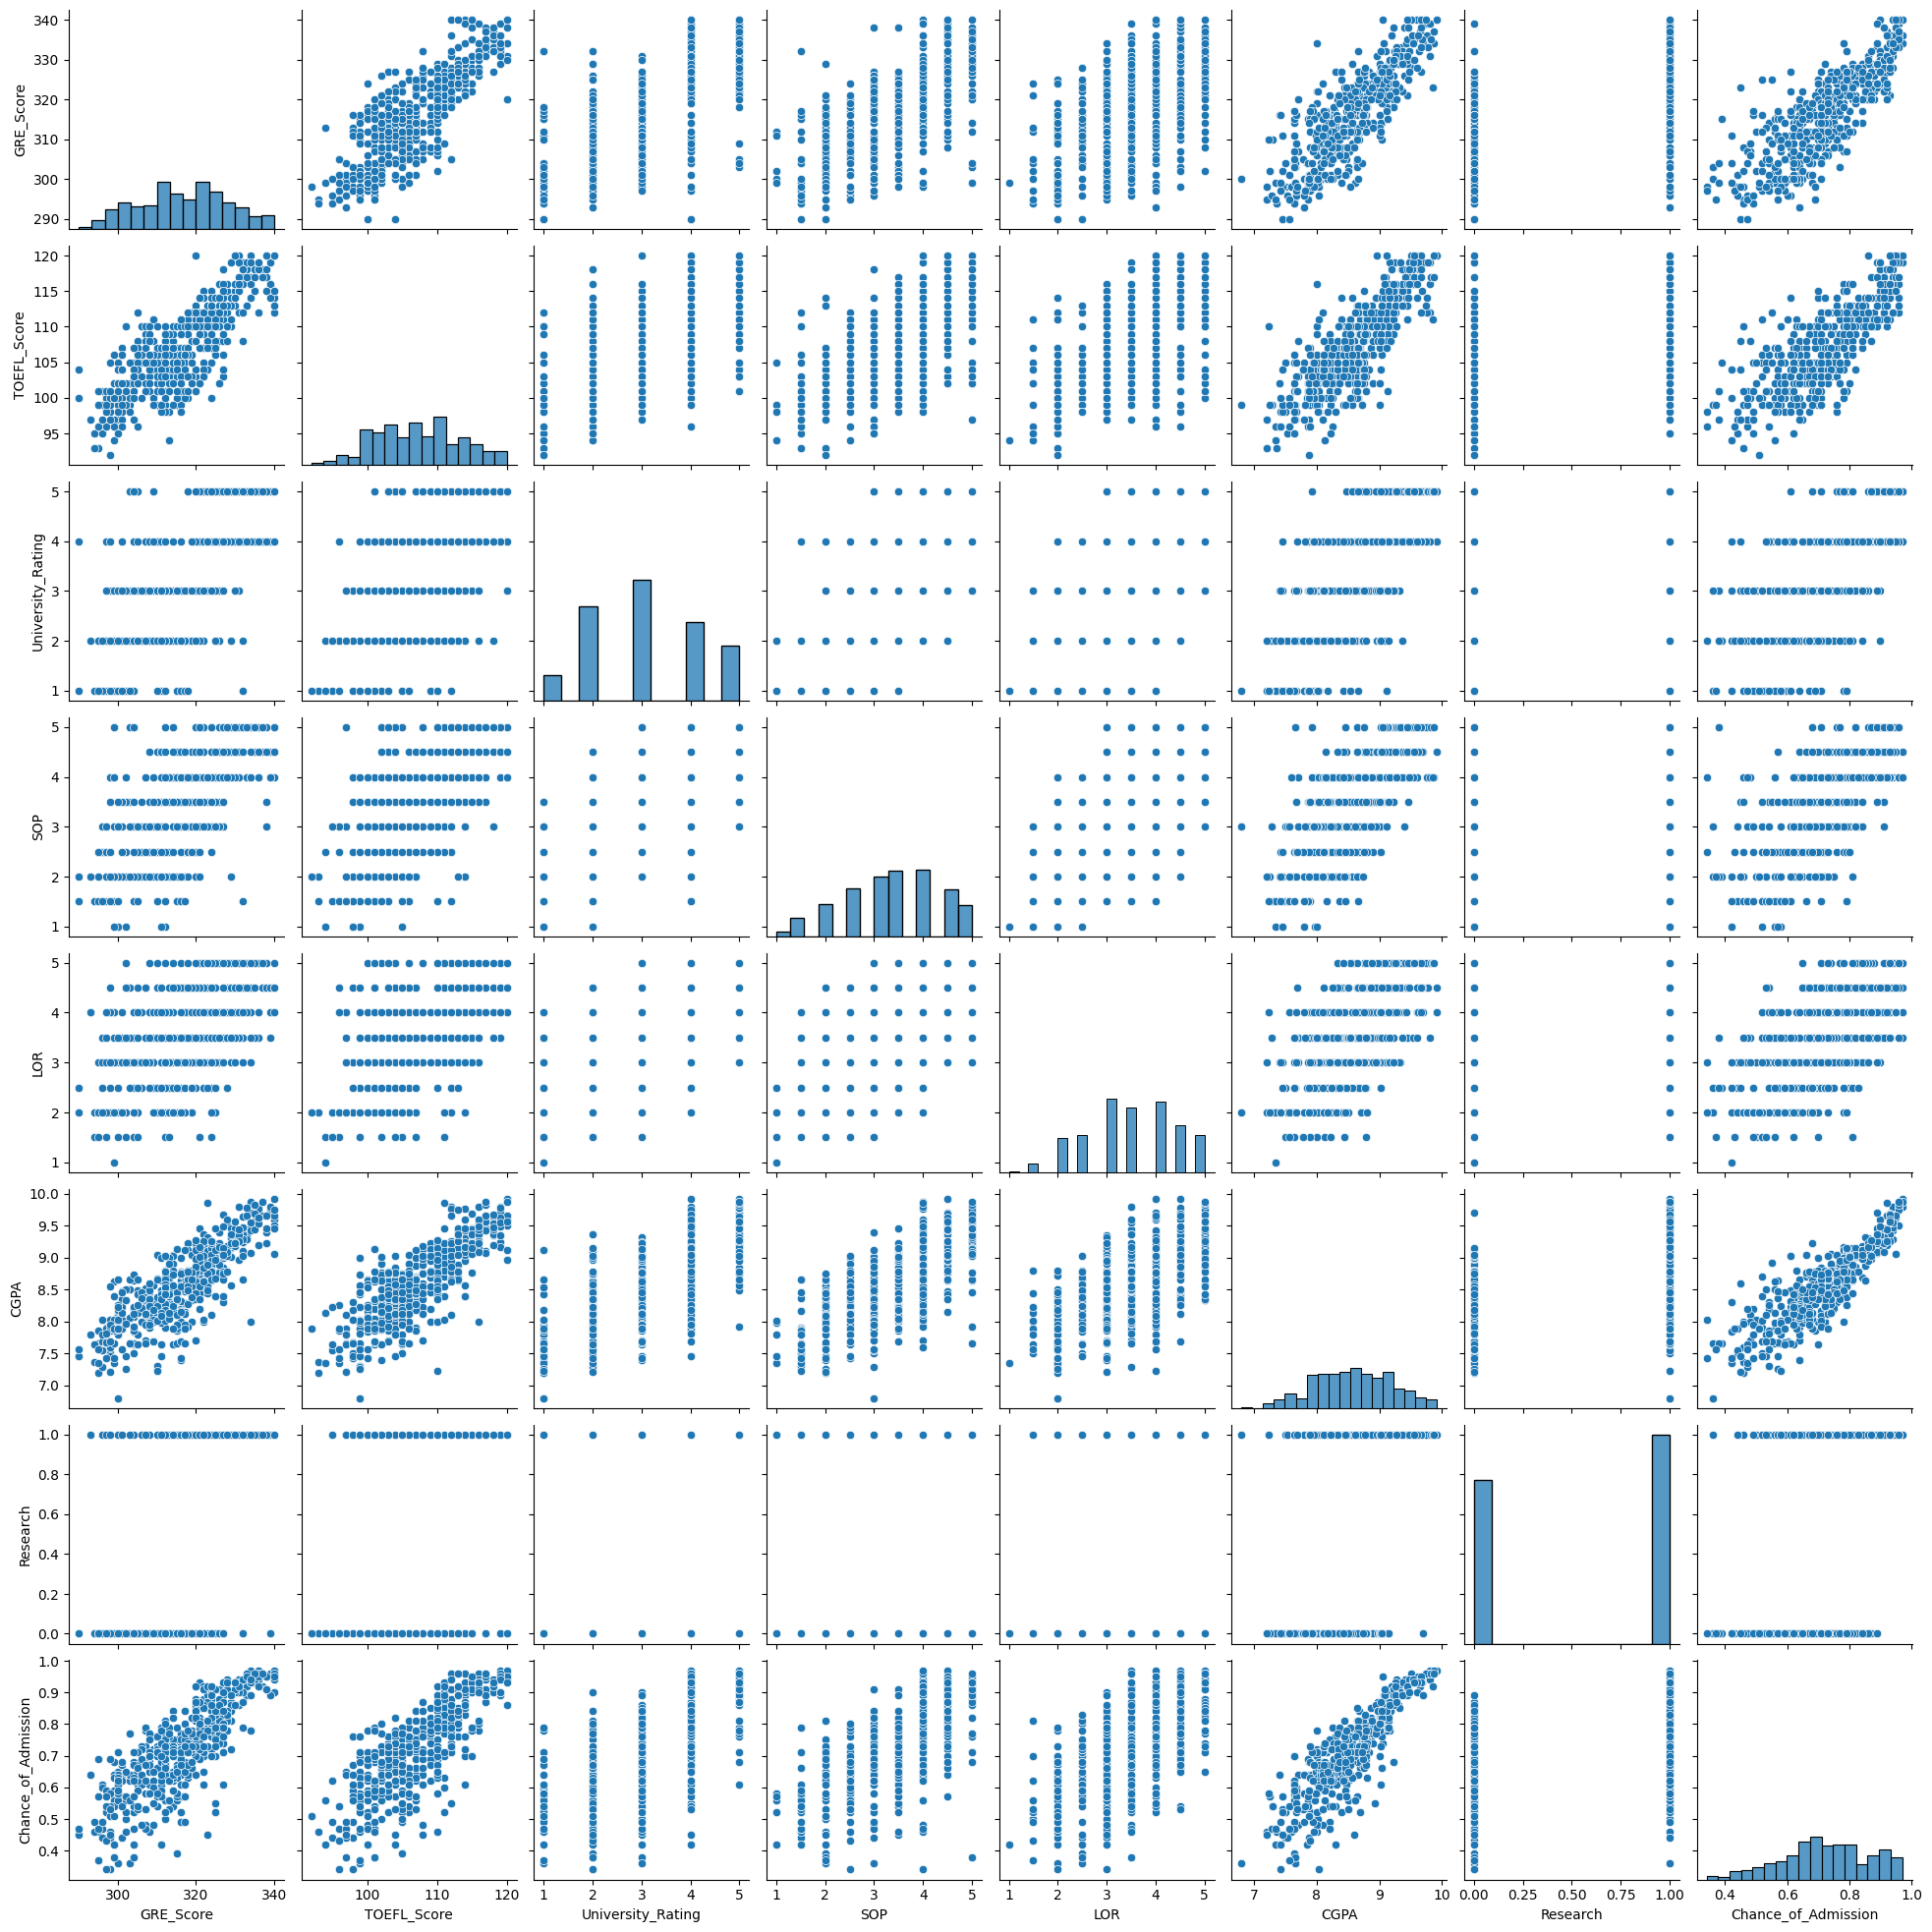

In [15]:
#pairplot
sns.pairplot(university_df)
plt.show()

In [16]:
#terlihat bahwa korelasi yg baik yaitu antara TOEFL vs CGPA, GRE vs CGPA, TOEFL vs GRE

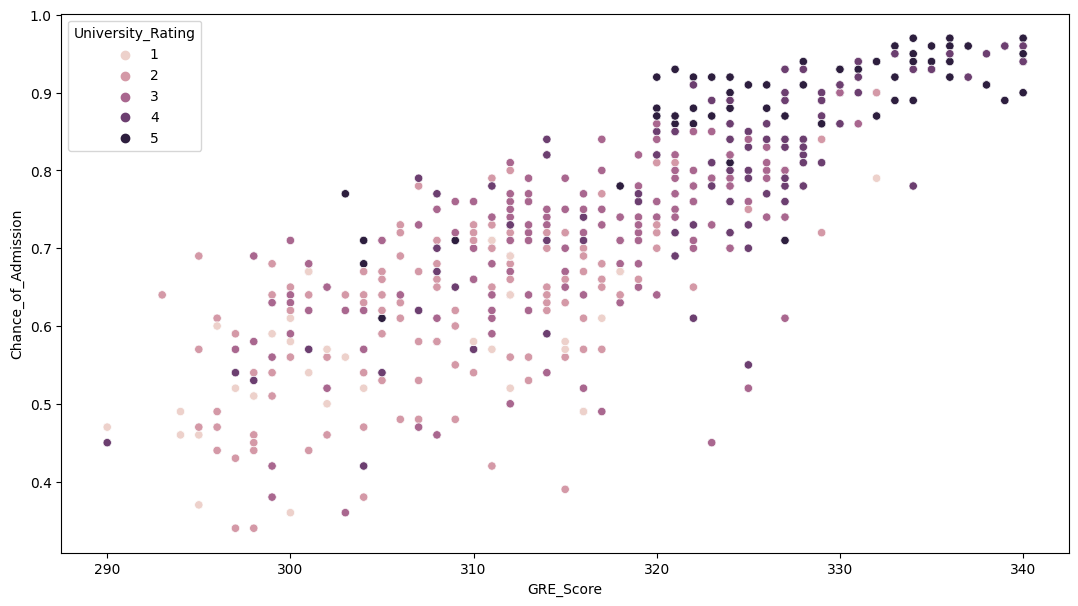

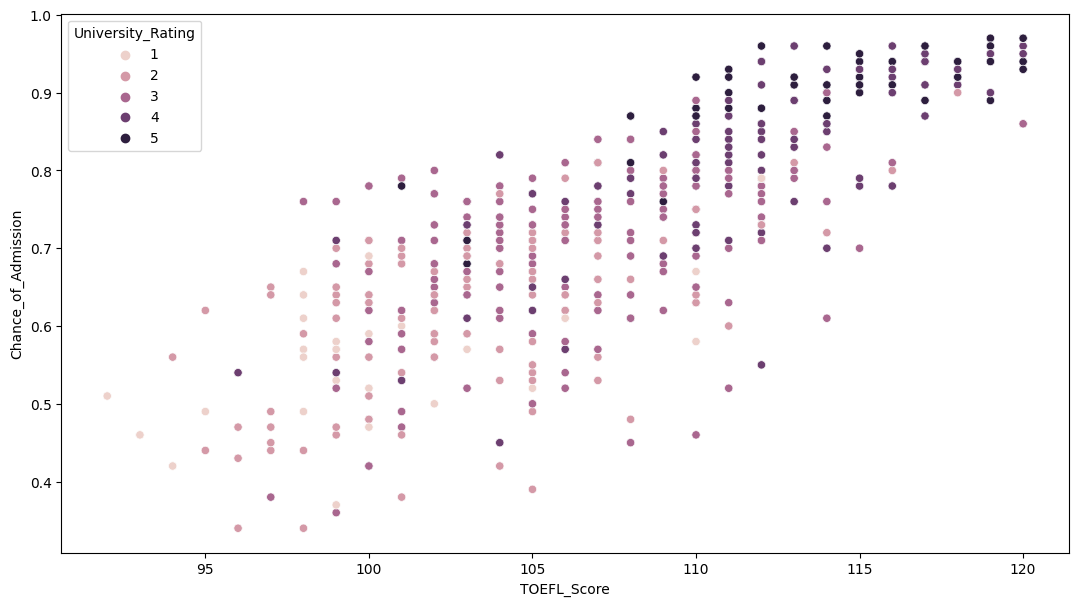

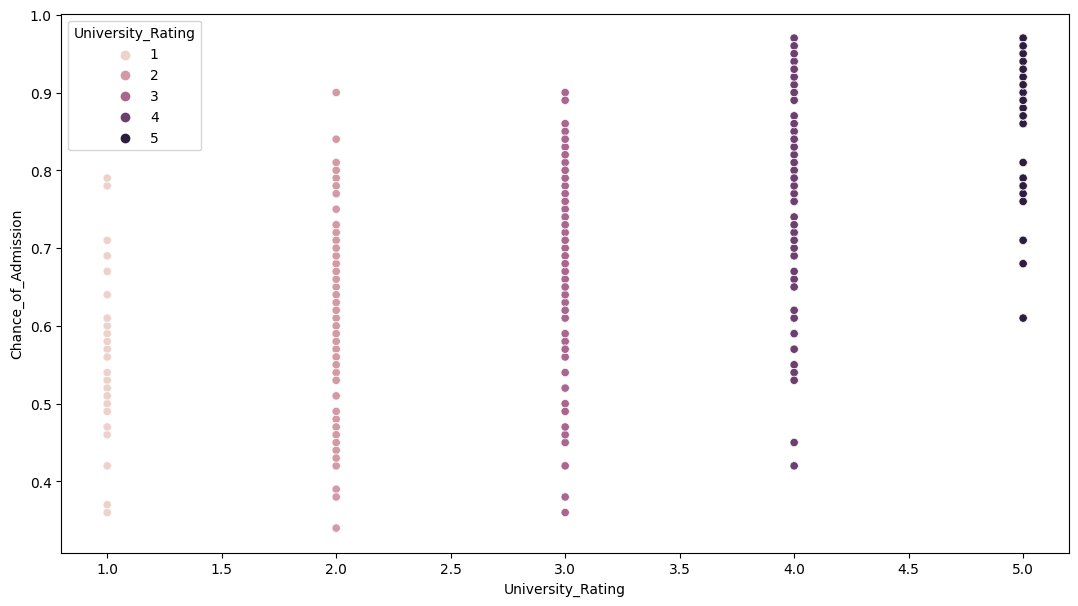

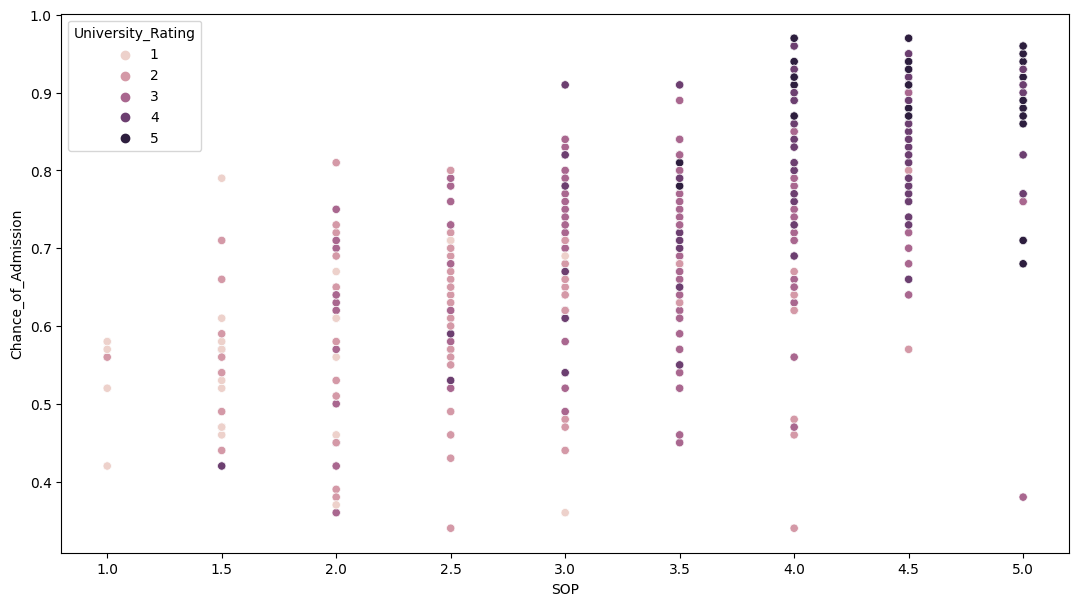

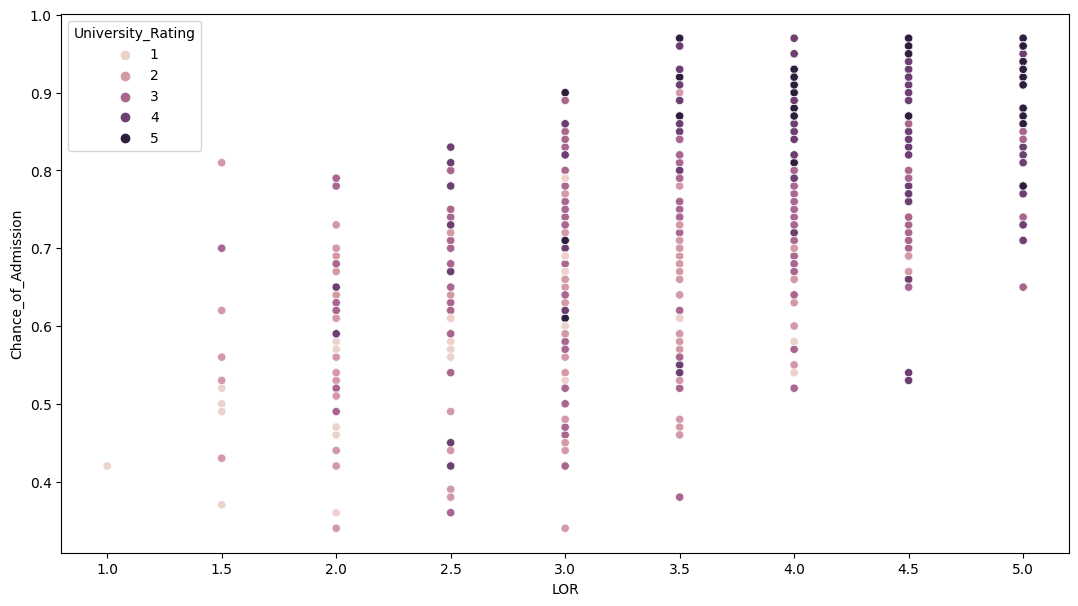

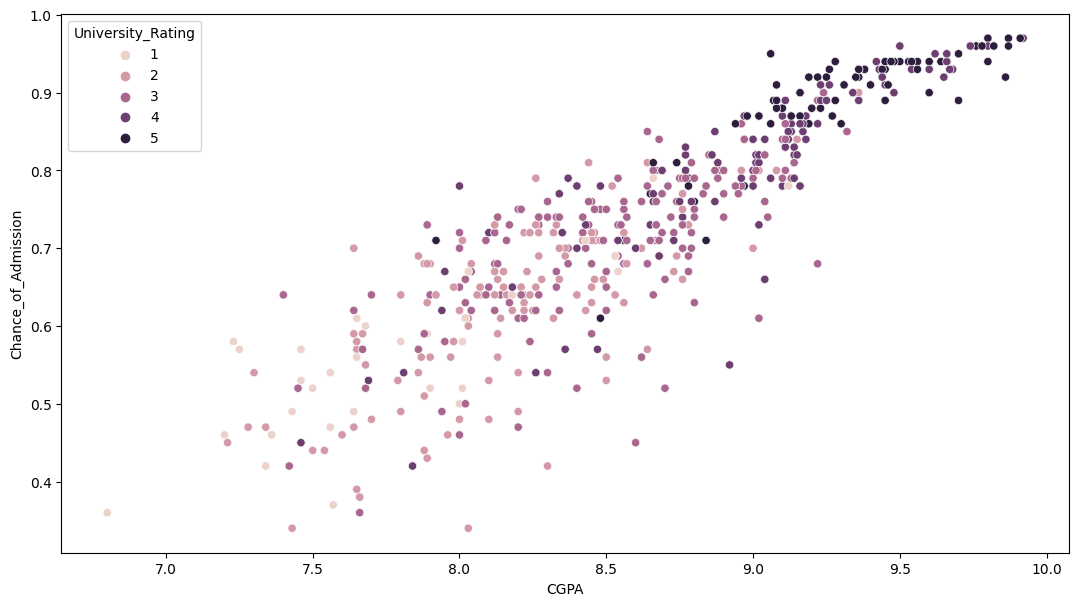

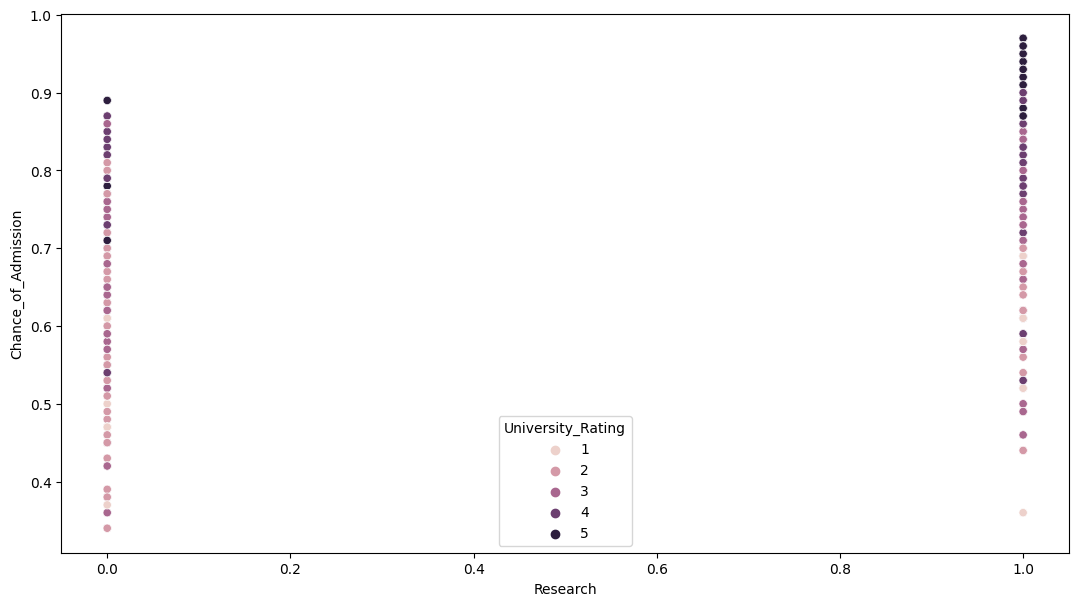

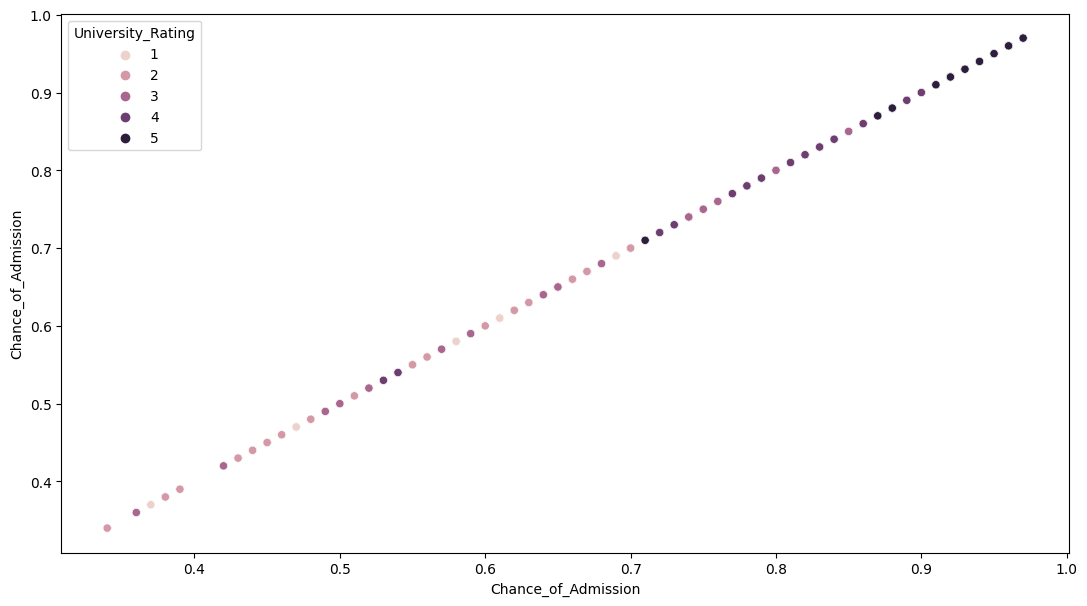

In [17]:
#melihat distribusi data University_Rating dgn variabel lainnya
for i in university_df.columns:
  plt.figure(figsize= (13,7))
  sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = 'University_Rating', hue_norm = (1,5), data = university_df)
  plt.show()

<Axes: >

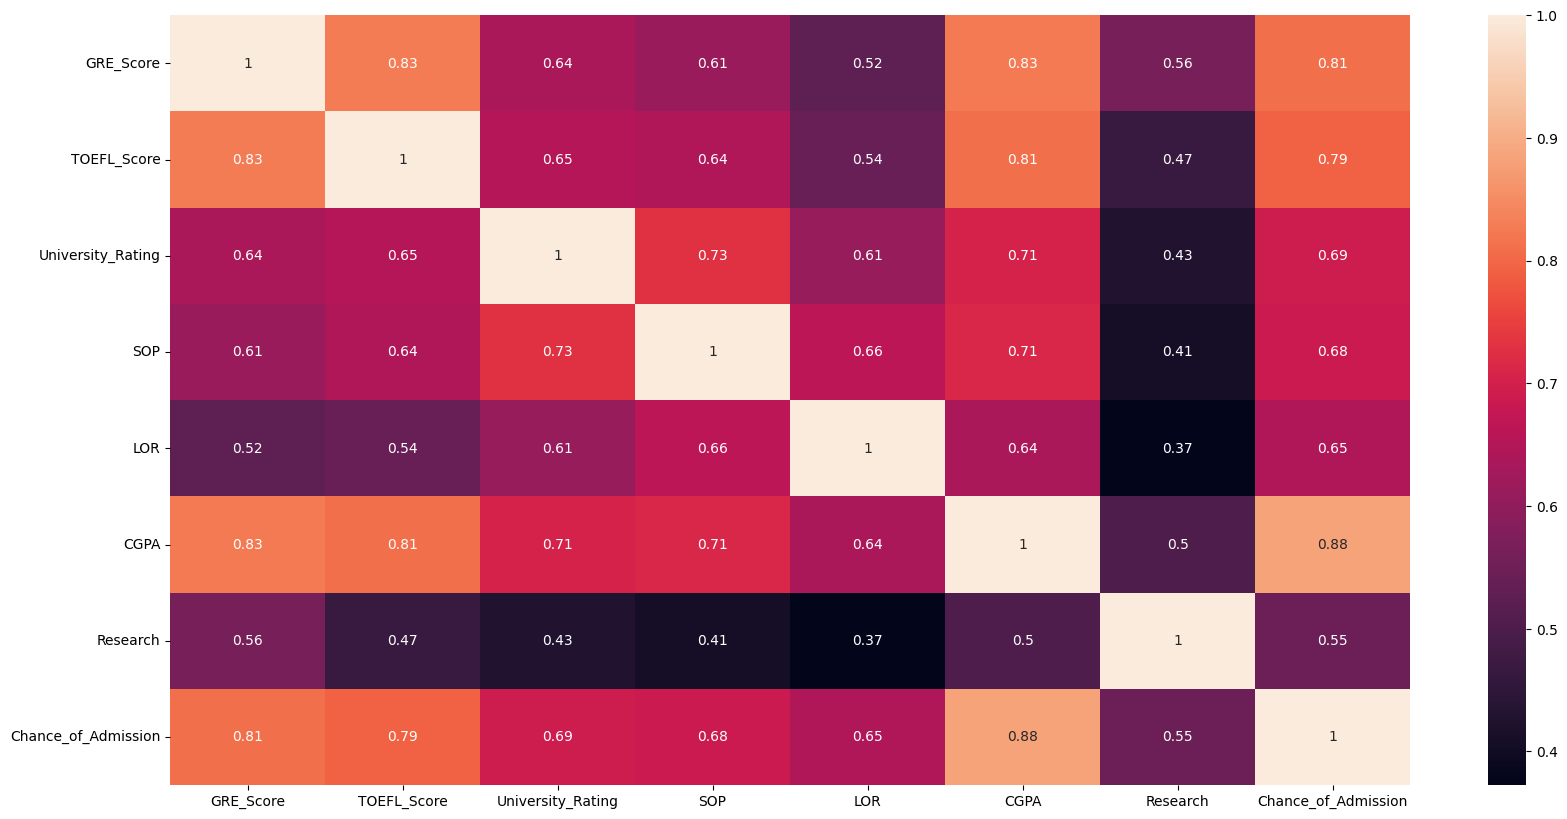

In [18]:
#plot matriks korelasi
plt.figure(figsize = (20, 10))
sns.heatmap(university_df.corr(), annot = True)

In [19]:
#LATIHAN 3
#persiapan data sebelum pelatihan model
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [20]:
x = university_df.drop(columns = ['Chance_of_Admission']) #kolomnya dihilangin mau dibuat sumbu y(target)
y = university_df['Chance_of_Admission']

In [21]:
x.shape #sekarang kolomnya tinggal 7

(1000, 7)

In [22]:
y.shape #hanya 1 kolom dengan 1000 baris

(1000,)

In [23]:
#dibuat jadi list atau array
X = np.array(x)
y = np.array(y)

In [24]:
#mengubah ukuran array dari(1000,)menjadi (1000, 1)
y = y.reshape(-1,1) #-1 baris, 1 kolom
y.shape

(1000, 1)

In [25]:
#LATIHAN 4
#latih dan evaluasi algoritma xg-boost
!pip install xgboost

In [26]:
import xgboost as xgb

In [27]:
#xgboost bisa digunakan untuk regresi dan klasifikasi
#objective nya squared error
#ekstrem parameter: memengaruhi machine learning melakukan regresi data
#learning rate mengatur seberapa agresif ML akan belajar (0 - 1)
#max_depth menentukan berapa layer kedalaman per decision tree
#n estimators ialah number estimator (1-1000)
## membuat model
model = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)

In [33]:
#seluruh informasi yang telah ML pelajari tersimpan pada model, model mempelajari hubungan antara x dan y
##mencocokan model
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
#memprediksi skor model yang dilatih menggunakan dataset pengujian
result = model.score(x, y) #mengevaluasi model dg method score . model melakukan prediksi dgn masukan nilai x dan akan dibandingkan dgn y_predict
print("R2 Score: {}".format(result)) #r score = regresion score (86% dapat divariasi dari akurasi modelnya)

R2 Score: 0.8676521119847311


In [35]:
#prediksi data uji
y_predict = model.predict(x) #prediksi data baru

In [ ]:
y_predict

In [37]:
## Calculate MAE, MSE, R2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [38]:
RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)), '.3f')) #root mean square error yg diakarkan

In [39]:
MSE = mean_squared_error(y, y_predict)
MAE = mean_squared_error(y, y_predict)
r2 = r2_score(y, y_predict) #nilai RMSE, MSE, MAE semakin dekat dengan nol maka semakin bagus

In [40]:
print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nr2 =', r2)

RMSE = 0.051 
MSE = 0.0026311782392522474 
MAE = 0.0026311782392522474 
r2 = 0.8676521119847311


In [41]:
# melatih kembali dengan nilai max_depth dgn lebih kecil
model = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 1, n_estimators = 100)

In [42]:
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
result = model.score(x, y)
print("R2 Score: {}".format(result))

R2 Score: 0.8389246472391785


In [44]:
y_predict = model.predict(x)
y_predict

array([0.9279156 , 0.79380876, 0.6373426 , 0.738258  , 0.6490616 ,
       0.89508784, 0.7101297 , 0.60925335, 0.5649091 , 0.7027505 ,
       0.7335674 , 0.81260794, 0.8496115 , 0.6187347 , 0.6616445 ,
       0.66071075, 0.69519967, 0.6441863 , 0.716232  , 0.65148044,
       0.6202155 , 0.6994357 , 0.91737765, 0.94100124, 0.9348569 ,
       0.9378816 , 0.76644737, 0.51122934, 0.45886675, 0.517349  ,
       0.5869233 , 0.7179647 , 0.92281294, 0.933067  , 0.94437444,
       0.8815484 , 0.65858835, 0.542359  , 0.5000265 , 0.57542706,
       0.628068  , 0.66816974, 0.683755  , 0.859815  , 0.8972219 ,
       0.85994107, 0.8985031 , 0.9185042 , 0.79638994, 0.7381051 ,
       0.6792221 , 0.6184668 , 0.6918436 , 0.68700886, 0.6471583 ,
       0.60325   , 0.54159045, 0.48924237, 0.44141027, 0.64904416,
       0.62302387, 0.6284808 , 0.6433367 , 0.6916075 , 0.7309113 ,
       0.7695103 , 0.7744972 , 0.7197683 , 0.827613  , 0.85858774,
       0.9449001 , 0.9507141 , 0.91021657, 0.7834148 , 0.75333

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [46]:
RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)), '.3f'))

In [47]:
MSE = mean_squared_error(y, y_predict)
MAE = mean_squared_error(y, y_predict)
r2 = r2_score(y, y_predict)

In [48]:
print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nr2 =', r2)

RMSE = 0.057 
MSE = 0.0032023024274876032 
MAE = 0.0032023024274876032 
r2 = 0.8389246472391785


In [49]:
#dengan mengganti nilai salah satu hyper parameter saja misal max_depth akan merubah hasil dari model yg dihasilkan, semakin tinggi nilai max_depth nya nilai modelnya juga meningkat